# Lecture 0: Dynamical models

In [1]:
import numpy as np
import networkx as nx

In [2]:
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

**New modules!** [tqdm](https://github.com/tqdm/tqdm) permits to check nicely how fast is your loop running:

In [3]:
from tqdm import notebook

## Basic properties of Hep-th network
Hep-th is the categories in arXiv devoted to theoretical (th) papers in High Energy Physics (HEP). The present network represents the co-authorship of various scholars:
![](../Images/hep_th_net.png)

### Loading data

In [6]:
data=np.genfromtxt('../Data/ca-HepTh.txt', skip_header=2, dtype='i8')-1

In [7]:
len(data)

51971

In [8]:
vertices=np.unique(data)

In [9]:
lv=len(vertices)

In [10]:
print(lv)

9877


In [11]:
le=len(data)

In [12]:
le

51971

### Define the network

In [13]:
hep_th_nx=nx.Graph()
hep_th_nx.add_edges_from(data)

Do not draw it! The network is too big to be plotted in a time compatible with the length of the lectures. In this cases:
1. use GePhi to plot your network;
2. use python igraph (for the new version the installation is much more straightforward than before).

For the present goal we can study the network without showing it, illustrating some smaller example.

#### Degree distribution

In [14]:
hep_th_nx.degree()

DegreeView({0: 3, 49153: 2, 10923: 1, 32772: 7, 49160: 2, 32779: 2, 49164: 8, 49165: 2, 15: 9, 65552: 23, 49171: 7, 49172: 2, 49173: 2, 58376: 1, 49175: 2, 49176: 2, 65561: 11, 16410: 17, 49180: 6, 16413: 6, 16414: 2, 32799: 18, 65569: 4, 65570: 1, 32803: 1, 49189: 4, 38: 2, 16423: 1, 33934: 3, 16426: 3, 43: 1, 44: 1, 32813: 12, 32814: 2, 32816: 1, 65585: 8, 16434: 3, 43699: 9, 5471: 2, 65596: 2, 65598: 1, 32831: 10, 32832: 31, 32833: 1, 16450: 6, 49219: 2, 16452: 2, 32837: 7, 16454: 8, 54625: 1, 49224: 6, 65614: 3, 19095: 2, 65616: 4, 65617: 3, 65618: 2, 16467: 1, 65620: 5, 65621: 1, 65623: 3, 65624: 3, 65625: 2, 65626: 6, 32859: 3, 16476: 1, 32862: 1, 32863: 2, 96: 30, 65633: 3, 16482: 4, 49253: 15, 51900: 6, 59470: 38, 65646: 2, 16495: 23, 32880: 12, 65649: 3, 65650: 1, 115: 14, 10942: 7, 62825: 2, 27327: 4, 65660: 4, 65661: 2, 4: 2, 16511: 2, 128: 1, 31851: 4, 131: 2, 135: 7, 16520: 11, 16521: 3, 139: 3, 27330: 6, 49294: 36, 38253: 2, 32912: 1, 49298: 12, 32915: 1, 49300: 1, 8358: 

In [18]:
hep_th_k=np.array(hep_th_nx.degree())

In [19]:
hep_th_kk=np.unique(hep_th_k[:,1], return_counts=True)

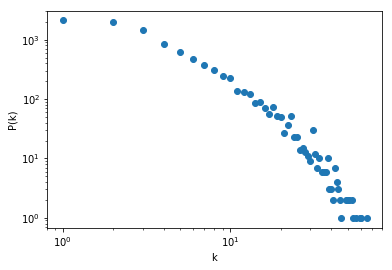

In [20]:
plt.scatter(hep_th_kk[0], hep_th_kk[1])
plt.xlabel('k')
plt.ylabel('P(k)')
plt.xscale('log')
plt.yscale('log')
plt.show()

#### Clustering coefficient

In [21]:
hep_th_clust=nx.average_clustering(hep_th_nx)

In [22]:
print(hep_th_clust)

0.47143905296693306


In [23]:
%timeit nx.average_clustering(hep_th_nx)

416 ms ± 919 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Average Shortest Path Length

In [24]:
nx.average_shortest_path_length(hep_th_nx)

NetworkXError: Graph is not connected.

In [53]:
hep_th_nx_lcc=max(nx.connected_components(hep_th_nx), key=len)

In [54]:
hep_th_nx_lcc=hep_th_nx.subgraph(hep_th_nx_lcc).copy()

In [55]:
print(hep_th_nx.number_of_nodes())
print(hep_th_nx_lcc.number_of_nodes())

9877
8638


**!!!DO NOT EVALUATE!!!**
The Average Shortest Path Length is an heavy calculation and it takes a long time.

In [59]:
hep_th_aspl=nx.average_shortest_path_length(hep_th_nx_lcc)

In [60]:
hep_th_aspl

5.945432380163172

### Summarizing

So far for the real network of collaboration on Hep-Th we saw that:
1. the degree sequence is power law distributed;
2. the clustering coefficient is quite high;
3. the average shortest path length is quite small.  
Due to the long calculation times of the ASPL, we will focus on the first two only.

## Regular graphs

In [29]:
lv

9877

Before considering lv vertices, let us start with something easy in order to get confidence with networkX:

In [77]:
cacca=nx.random_regular_graph(4, 6)

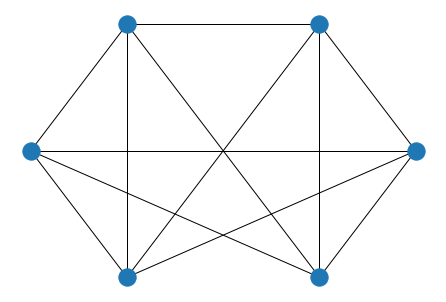

In [78]:
nx.draw_circular(cacca)

In networkX there are even circular lattices:

In [79]:
cacca=nx.circulant_graph(10, [1,2,3])

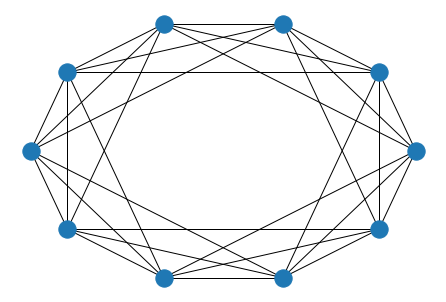

In [80]:
nx.draw_kamada_kawai(cacca)

In [81]:
le/lv

5.261820390806925

The average degree is something more than 5. Let us define a regular network with degree equal to the average and with the same number of nodes of Hep-th.

In [84]:
regular=nx.random_regular_graph(5, lv)

NetworkXError: n * d must be even

In [85]:
lv

9877

D'oh!

In [86]:
regular_total=nx.random_regular_graph(6, lv)

In [87]:
circular_total=nx.circulant_graph(lv, [1,2,3])

Basic properties:

In [88]:
regular_total.number_of_nodes()

9877

In [89]:
circular_total.number_of_nodes()

9877

In [90]:
regular_total.number_of_edges()

29631

In [91]:
circular_total.number_of_edges()

29631

In [92]:
hep_th_nx.number_of_edges()

25998

The number of edges of the real network is a little smaller, as expected.

### A smaller example

Let us focus on smaller graph, in order to have a direct understanding of the properties of the systems in a proper amount of time.

In [93]:
smaller_example_size=500

In [94]:
smaller_regular=nx.random_regular_graph(6, smaller_example_size)

In [95]:
smaller_circular=nx.circulant_graph(smaller_example_size, [1,2,3])

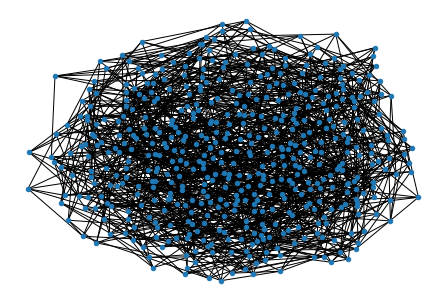

In [96]:
nx.draw(smaller_regular, node_size=20)

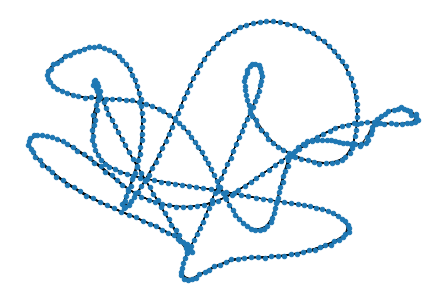

In [97]:
nx.draw(smaller_circular, node_size=20)

#### Degree distribution

Of course, the degree distribution is quite stupid here...

In [98]:
reg_k=np.array(smaller_regular.degree())

In [99]:
np.unique(reg_k[:, 1])

array([6])

In [100]:
cir_k=np.array(smaller_circular.degree())

In [101]:
np.unique(cir_k[:, 1])

array([6])

#### Clustering coefficient

The average clustering is completely different in the two cases.

In [102]:
smaller_regular_c=nx.average_clustering(smaller_regular)
print(smaller_regular_c)

0.0072000000000000085


In [103]:
smaller_circular_c=nx.average_clustering(smaller_circular)
print(smaller_circular_c)

0.5999999999999999


In [105]:
hep_th_clust

0.47143905296693306

#### Average Shortest Path Length

The same is true for the Average Shortest Path Length...

In [215]:
smaller_regular_apl=nx.average_shortest_path_length(smaller_regular)
print(smaller_regular_apl)

3.745931863727455


In [216]:
smaller_circular_apl=nx.average_shortest_path_length(smaller_circular)
print(smaller_circular_apl)

42.08416833667334


In [217]:
hep_th_aspl

5.945432380163172

### Summarizing

While the **degree sequence** of regular graphs is completely different from the one in a real network, only one between the **clustering** and the **ASPL** is correctly reproduced by the considered regular graph.

## Erdos-Renyi

### Let's implement our own Erdos-Renyi (a la Solomonoff)

Actually there is a numpy submodule generating random numbers, that is call (surprise surprise) random

In [109]:
from numpy import random

rand returns a random number in the interval (0,1) when it has no argument...

In [110]:
random.rand()

0.7446774214460092

...otherwise:

In [111]:
random.rand(42)

array([0.21771478, 0.91126964, 0.82607505, 0.56892772, 0.459294  ,
       0.11205075, 0.73561879, 0.2357636 , 0.94719149, 0.16980482,
       0.27723072, 0.14687513, 0.72678664, 0.96351403, 0.88403312,
       0.39111534, 0.11449695, 0.28205366, 0.08687357, 0.99040868,
       0.32292402, 0.11713867, 0.53810509, 0.45161091, 0.35935825,
       0.03368612, 0.02504584, 0.97901838, 0.28999058, 0.54823   ,
       0.15983085, 0.22132786, 0.6854886 , 0.2083657 , 0.72393082,
       0.48488373, 0.10894697, 0.09902256, 0.34767432, 0.18940473,
       0.04475309, 0.9963361 ])

In [112]:
max_link_number=int(lv*(lv-1)/2)

In [113]:
max_link_number

48772626

In [114]:
le/lv

5.261820390806925

The Erdos-Renyi probability

In [115]:
p_er=le/max_link_number

In [116]:
p_er

0.001065577235886376

In order to take track of the progress, let's use tqdm!

>tqdm means "progress" in Arabic (taqadum, تقدّم) and is an abbreviation for "I love you so much" in Spanish (te quiero demasiado).

--- tqdm repository

#### Different approaches: sampling race

Sampling time after time...

In [117]:
edge_list_er=[]


for v in notebook.tqdm(range(lv-1)):
    for w in range(v+1, lv):
        if random.rand()<p_er:
            edge_list_er.append((v, w))


...or sampling everything at the very beginning?

In [118]:
np.sum(random.rand(max_link_number)<p_er)

51974

In [119]:
le

51971

In [120]:
edge_list_er=[]
v_counter=0
er_mask=random.rand(max_link_number)<p_er
for v in notebook.tqdm(range(lv-1)):
    for w in range(v+1, lv):
        if er_mask[v_counter]:
            edge_list_er.append((v, w))
        v_counter+=1

Actually tqdm already told us who's the faster one, but, for completeness, let's check the time taken for the two cases.

In [139]:
def mask_vec(p_er=p_er, lv=lv):
    edge_list_er=[]
    v_counter=0
    er_mask=random.rand(max_link_number)<p_er
    for v in range(lv-1):
        for w in range(v+1, lv):
            if er_mask[v_counter]:
                edge_list_er.append((v, w))
            v_counter+=1
    return edge_list_er

In [140]:
def random_vec(p_er=p_er, lv=lv):
    edge_list_er=[]
    v_counter=0
    
    for v in range(lv-1):
        for w in range(v+1, lv):
            if random.rand()<p_er:
                edge_list_er.append((v, w))
            v_counter+=1
    return edge_list_er

In [141]:
%timeit mask_vec()

5.78 s ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [142]:
%timeit random_vec()

20.9 s ± 139 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The mask method wins!   
**Caveat:** there is a tradeoff between how much memory you are using for the sample and the time needed for generating the sampled network. In the present exercise, we are using relatively small networks, thus there is no problem in saving somewhere a mask of $lv\cdot(lv-1)/2$, but the situation changes when $lv\sim10^{6}$...

### A smaller example

In [147]:
smaller_example_size

500

Let's use a probability per link such that the average degree is fixed to 6 (as in the previous cases). 

In [148]:
p_er_smaller=6/(smaller_example_size-1)

In [149]:
p_er_smaller

0.012024048096192385

In [150]:
p_er

0.001065577235886376

Actually, there is a difference of an order of magnitude

In [151]:
smaller_max_link_number=int(smaller_example_size*(smaller_example_size-1)/2)

In [152]:
smaller_max_link_number

124750

#### Degree distribution

In [157]:
s_er=nx.Graph()
edge_list_er=mask_vec(p_er=p_er_smaller, lv=smaller_example_size)
s_er.add_edges_from(edge_list_er)

In [158]:
s_er_k=np.array(s_er.degree())

In [159]:
s_er_kk=np.unique(s_er_k[:,1], return_counts=True)

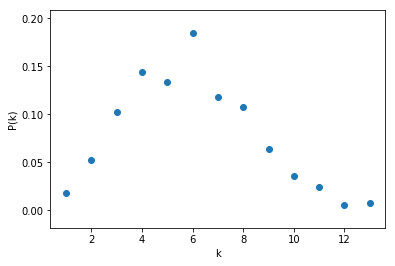

In [160]:
plt.scatter(s_er_kk[0], s_er_kk[1]/np.sum(s_er_kk[1]))
plt.xlabel('k')
plt.ylabel('P(k)')
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(0, 10)
plt.show()

In [161]:
np.average(s_er_k[:,1])

5.855711422845691

#### Clustering coefficient

Let's create a sample of 500 networks in order to average the average clustering coefficient.

In [199]:
l_sample=500

In [196]:
l_sample=2
clustering_er=np.zeros(l_sample)
for s in notebook.tqdm(range(l_sample)):
    s_er=nx.Graph()
    edge_list_er=mask_vec(p_er=p_er_smaller, lv=smaller_example_size)
    for edge in edge_list_er:
        s_er.add_edge(edge[0], edge[1])
    clustering_er[s]=nx.average_clustering(s_er)

In [200]:
clustering_er=np.zeros(l_sample)

for s in notebook.tqdm(range(l_sample)):
    counter=0
    s_er=nx.Graph()
    er_mask=random.rand(smaller_max_link_number)<p_er_smaller
    for v in range(smaller_example_size-1):
        for w in range(v+1, smaller_example_size):
            if er_mask[counter]:
                s_er.add_edge(v, w)
            counter+=1
    clustering_er[s]=nx.average_clustering(s_er)

In [201]:
noe, non=s_er.number_of_edges(), s_er.number_of_nodes()

In [202]:
noe, non

(1546, 498)

In [203]:
np.average(clustering_er)

0.011874512960135883

In [204]:
np.std(clustering_er)

0.002414234789238019

##### Summarising

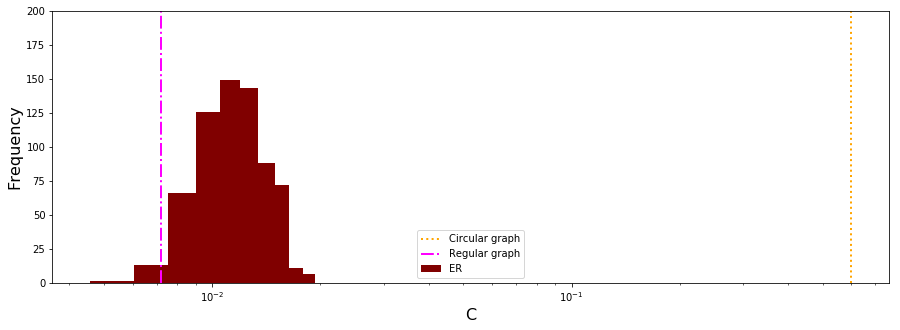

In [214]:
plt.figure(figsize=(15,5))
plt.hist(clustering_er, label='ER', color='maroon', density=1)
plt.plot([smaller_circular_c, smaller_circular_c],[0, 200], label='Circular graph', linestyle='dotted', color='orange', linewidth=2)
plt.plot([smaller_regular_c, smaller_regular_c],[0, 200], label='Regular graph', linestyle='-.', color='magenta', linewidth=2)
plt.legend()
plt.xlabel('C', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xscale('log')
plt.ylim(0, 200)
plt.savefig('../Images/er_reg_clustering.png')
plt.show()

#### Average Shortest Path Length

In [218]:
apl_er=np.zeros(l_sample)

for s in notebook.tqdm(range(l_sample)):
    counter=0
    s_er=nx.Graph()
    er_mask=random.rand(smaller_max_link_number)<p_er_smaller
    for v in range(smaller_example_size-1):
        for w in range(v+1, smaller_example_size):
            if er_mask[counter]:
                s_er.add_edge(v, w)
            counter+=1
    try:
        apl_er[s]=nx.average_shortest_path_length(s_er)
    except:
        s_er_lcc=max(nx.connected_components(s_er), key=len)
        s_er_lcc=s_er.subgraph(s_er_lcc).copy()
        apl_er[s]=nx.average_shortest_path_length(s_er_lcc)

In [219]:
np.average(apl_er)

3.6659270291554913

In [220]:
np.std(apl_er)

0.04622609305830931

##### Summarising

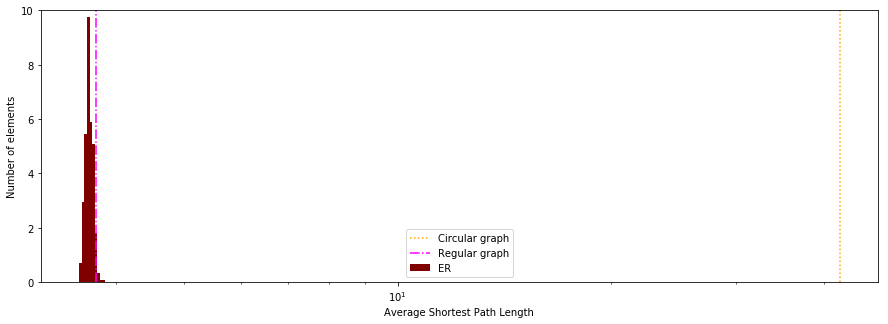

In [224]:
plt.figure(figsize=(15,5))
plt.hist(apl_er, density=1, label='ER', color='maroon')
plt.plot([smaller_circular_apl, smaller_circular_apl],[0, 10], label='Circular graph', linestyle='dotted', color='orange')
plt.plot([smaller_regular_apl, smaller_regular_apl],[0, 10], label='Regular graph', linestyle='-.', color='magenta')
plt.legend()
plt.xlabel('Average Shortest Path Length')
plt.ylabel('Number of elements')
plt.xscale('log')
plt.ylim(0,10)
plt.savefig('../Images/er_reg_ASPL.png')
plt.show()

## Watts-Strogatz (small world)

### Exercise: implement your own Watts-Strogatz graph
and plot the resulting graphs at varying the probability, from p=0.1 to p=1. (choose n=20 and k=6).

##### Hint

In [115]:
extremely_small_circular=nx.circulant_graph(10, [1,2,3])

In [116]:
ws_0=extremely_small_circular.copy()

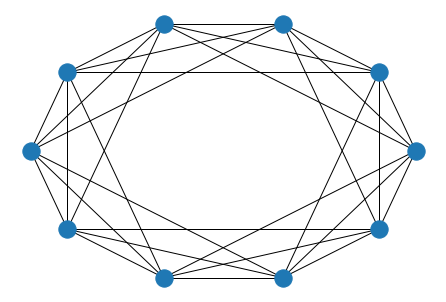

In [117]:
nx.draw_kamada_kawai(ws_0)

In the module _random_ is present a function that permits to sample form a 1-D array, according to some weights: random.choice

In [ ]:
random.choice()

Other hint:

In [118]:
ws_0[0]

AtlasView({1: {}, 2: {}, 3: {}, 7: {}, 8: {}, 9: {}})

##### Solution

### Let's focus again on greater examples
But still smaller than the real network.  
Actually... there is even the networkx function...

In [228]:
ws_vec=[nx.connected_watts_strogatz_graph(500, 6, p=10**(-p/2)) for p in range(6,-1, -1)]

In [235]:
circular=nx.circulant_graph(500, [1,2,3])

In [229]:
p_ws=[10**(-p/2) for p in range(6,-1, -1)]

The choice is intended to have 1 dot between $10^n$ and $10^{n+1}$.

In [230]:
len(p_ws)

7

In [231]:
p_ws

[0.001,
 0.0031622776601683794,
 0.01,
 0.03162277660168379,
 0.1,
 0.31622776601683794,
 1.0]

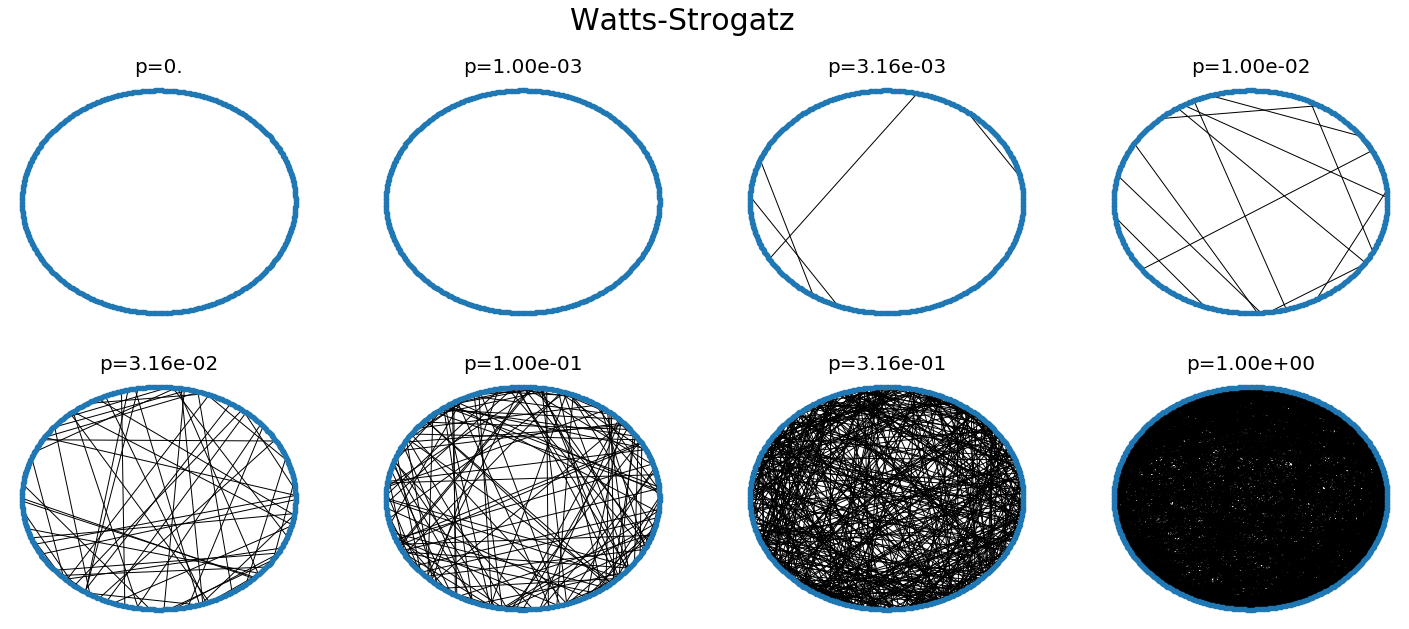

In [241]:
fig, ax_lst = plt.subplots(2, 4, figsize=(25,10))
fig.suptitle('Watts-Strogatz', fontsize=30)
circular=nx.circulant_graph(500, [1,2,3])

for t in range(len(p_ws)+1):
    x=(t)//4
    y=(t)%4
    
    if t!=0:

        nx.draw_circular(ws_vec[t-1], ax=ax_lst[x, y], node_size=20)
        ax_lst[x,y].set_title('p={:.2e}'.format(p_ws[t-1]), fontsize=20)
        
    else:
        nx.draw_circular(circular, ax=ax_lst[x, y], node_size=20)    
        ax_lst[x,y].set_title('p=0.', fontsize=20)
        
    ax_lst[x,y].axis('off')
    # cancel the frame
plt.savefig('../Images/ws_n_500_k_6.png')
plt.show()

### Degree distribution

In [242]:
p_ws=[10**(-p/2) for p in range(6,-1, -1)]

In [243]:
p_ws

[0.001,
 0.0031622776601683794,
 0.01,
 0.03162277660168379,
 0.1,
 0.31622776601683794,
 1.0]

In [244]:
ws_vec=[nx.watts_strogatz_graph(500, 6, p) for p in p_ws]

In [245]:
ws_vec_k=np.array(ws_vec[3].degree())

In [246]:
ws_vec_kk=np.unique(ws_vec_k[:,1], return_counts=True)

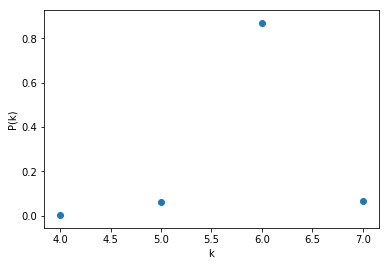

In [247]:
plt.scatter(ws_vec_kk[0], ws_vec_kk[1]/np.sum(ws_vec_kk[1]))
plt.xlabel('k')
plt.ylabel('P(k)')
plt.show()

In [248]:
titles=['p={:.2e}'.format(p) for p in p_ws]

In [249]:
titles

['p=1.00e-03',
 'p=3.16e-03',
 'p=1.00e-02',
 'p=3.16e-02',
 'p=1.00e-01',
 'p=3.16e-01',
 'p=1.00e+00']

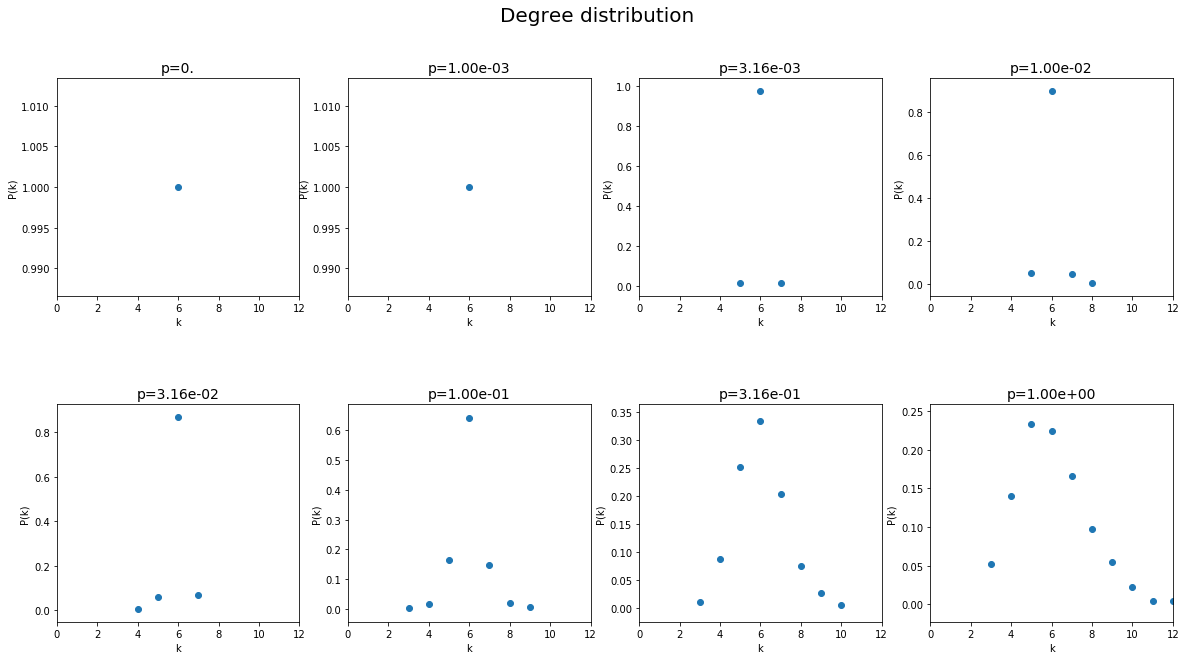

In [250]:
fig, ax_lst = plt.subplots(2, 4, figsize=(20,10))
fig.suptitle('Degree distribution', fontsize=20)

for t in range(8):
    y=t%4
    x=t//4
    if t!=0:
        ax_lst[x,y].set_title(titles[t-1], fontsize=14)
     
        ws_vec_k=np.array(ws_vec[t-1].degree())
        ws_vec_kk=np.unique(ws_vec_k[:,1], return_counts=True)
    
        ax_lst[x,y].scatter(ws_vec_kk[0], ws_vec_kk[1]/np.sum(ws_vec_kk[1]))
    else:
        ax_lst[x,y].set_title('p=0.', fontsize=14)
    
        ws_vec_k=np.array(smaller_circular.degree())
        ws_vec_kk=np.unique(ws_vec_k[:,1], return_counts=True)
    
        ax_lst[x,y].scatter(ws_vec_kk[0], ws_vec_kk[1]/np.sum(ws_vec_kk[1]))
    
        
    ax_lst[x,y].set_xlabel('k')
    ax_lst[x,y].set_ylabel('P(k)')
    ax_lst[x,y].set_xlim(0, 12)
    
plt.subplots_adjust(hspace=0.5)
# increase the space between the axis
plt.show()

### Clustering coefficient

In [251]:
ws_vec_ac=[nx.average_clustering(ws) for ws in ws_vec]

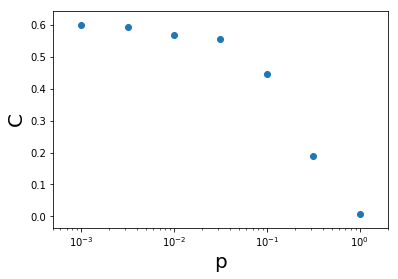

In [253]:
plt.scatter(p_ws, np.array(ws_vec_ac))
plt.xlabel('p', fontsize=20)
plt.ylabel('C', fontsize=20)
plt.xscale('log')
plt.xlim(5*10**-4, 2)
plt.show()

#### Actually...
It is a random model, thus we should consider the distribution over several realizations.

In [254]:
ppp=0.3

In [255]:
clustering_ws_03=np.zeros(l_sample)

for s in notebook.tqdm(range(l_sample)):
    counter=0
    s_ws=nx.connected_watts_strogatz_graph(500, 6, ppp)
    clustering_ws_03[s]=nx.average_clustering(s_ws)

In [256]:
ppp=0.1

In [257]:
clustering_ws_01=np.zeros(l_sample)

for s in notebook.tqdm(range(l_sample)):
    counter=0
    s_ws=nx.connected_watts_strogatz_graph(500, 6, ppp)
    clustering_ws_01[s]=nx.average_clustering(s_ws)

In [258]:
ppp=0.01

In [259]:
clustering_ws_001=np.zeros(l_sample)

for s in notebook.tqdm(range(l_sample)):
    counter=0
    s_ws=nx.connected_watts_strogatz_graph(500, 6, ppp)
    clustering_ws_001[s]=nx.average_clustering(s_ws)

In [260]:
np.average(clustering_ws_03)

0.21566932749472784

In [261]:
np.average(clustering_ws_01)

0.4447399275613272

In [262]:
np.average(clustering_ws_001)

0.5830642190476185

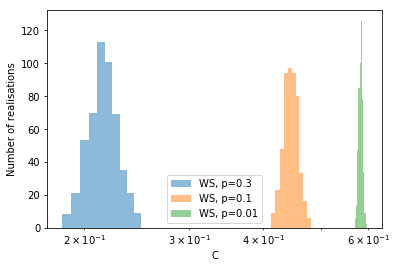

In [263]:
plt.hist(clustering_ws_03, bins=10, label='WS, p=0.3', alpha=0.5)
plt.hist(clustering_ws_01, bins=10, label='WS, p=0.1', alpha=0.5)
plt.hist(clustering_ws_001, bins=10, label='WS, p=0.01', alpha=0.5)
plt.legend()
plt.xlabel('C')
plt.ylabel('Number of realisations')
plt.xscale('log')
plt.savefig('../Images/ws_clustering.png')
plt.show()

#### Summarising

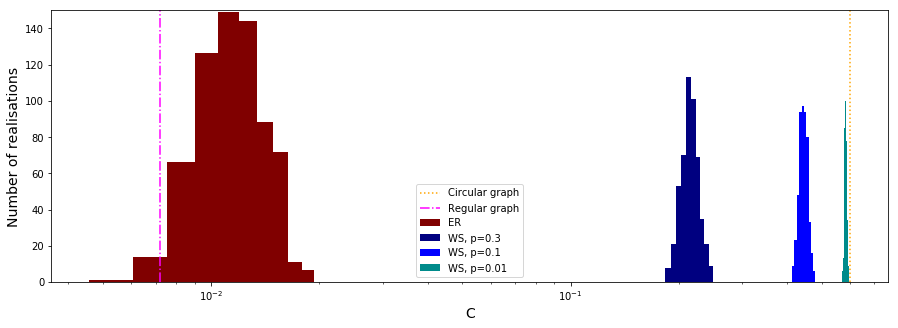

In [283]:
plt.figure(figsize=(15,5))
plt.hist(clustering_er,  label='ER', color='maroon', density=1)
plt.plot([smaller_circular_c, smaller_circular_c],[0, 180], label='Circular graph', linestyle='dotted', color='orange')
plt.plot([smaller_regular_c, smaller_regular_c],[0, 180], label='Regular graph', linestyle='-.', color='magenta')
plt.hist(clustering_ws_03,  label='WS, p=0.3', color='navy')
plt.hist(clustering_ws_01,  label='WS, p=0.1', color='blue')
plt.hist(clustering_ws_001, label='WS, p=0.01', color='darkcyan')
#for t in enumerate(titles):
#    plt.plot([ws_vec_ac[t[0]],ws_vec_ac[t[0]]],[0, 200], label='WS'+t[1], linestyle='--')
plt.legend()
plt.xlabel('C', fontsize=14)
plt.ylabel('Number of realisations', fontsize=14)
plt.xscale('log')
plt.ylim(0, 150)
plt.savefig('../Images/ws_er_reg_clustering.png')
plt.show()

### Average Shortest Path Length

In [284]:
ws_vec_aspl=[nx.average_shortest_path_length(ws) for ws in ws_vec]

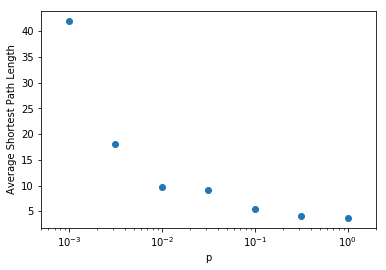

In [285]:
plt.scatter(p_ws, np.array(ws_vec_aspl))
plt.xlabel('p')
plt.ylabel('Average Shortest Path Length')
plt.xscale('log')
plt.xlim(5*10**-4, 2)
plt.show()

#### Again...
It is a random model, thus we should consider the distribution over several realizations. 
Since the Average Shortest Path Length is quite a heavy computation and since we saw that the distribution are indeed quite narrow, we will not plot the distribution of the values of the ASPL for a sample of WS networks.
For your information, the calculation below took nearly 12 minutes on the server...

In [286]:
ppp=0.1

In [287]:
aspl_ws_01=np.zeros(l_sample)

for s in notebook.tqdm(range(l_sample)):
    counter=0
    s_ws=nx.connected_watts_strogatz_graph(500, 6, ppp)
    aspl_ws_01[s]=nx.average_shortest_path_length(s_ws)

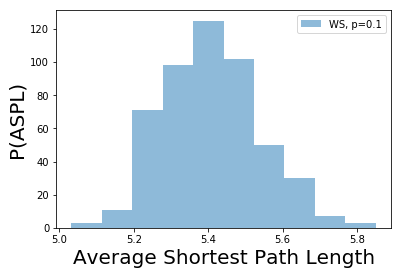

In [288]:
plt.hist(aspl_ws_01, bins=10, label='WS, p=0.1', alpha=0.5)
plt.legend()
plt.xlabel('Average Shortest Path Length', fontsize=20)
plt.ylabel('P(ASPL)', fontsize=20)
plt.show()

#### Exercise: Average Shortest Path Length vs. Clustering

Reproduce the figure in the slides by Rossana:
![](../Images/ws_clustering_vs_ASPL.png)

##### Solution

#### Summarising

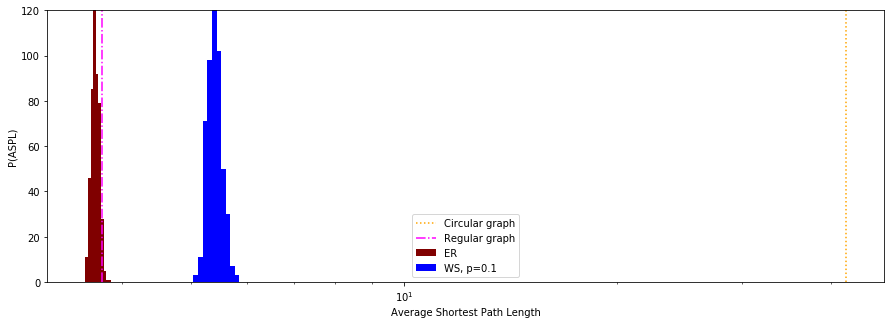

In [289]:
plt.figure(figsize=(15,5))
plt.hist(apl_er, label='ER', color='maroon')
plt.plot([smaller_circular_apl, smaller_circular_apl],[0, 150], label='Circular graph', linestyle='dotted', color='orange')
plt.plot([smaller_regular_apl, smaller_regular_apl],[0, 150], label='Regular graph', linestyle='-.', color='magenta')
plt.hist(aspl_ws_01, bins=10, label='WS, p=0.1', color='blue')
plt.legend()
plt.xlabel('Average Shortest Path Length')
plt.ylabel('P(ASPL)')
plt.xscale('log')
plt.ylim(0,120)
plt.savefig('../Images/ws_er_reg_ASPL.png')
plt.show()

## Barabasi-Albert

### Exercise: implement your own Barabasi-Albert

##### Hint

In [ ]:
random.choice()

##### Solution

##### Check: degree distribution

### Actually...

Even in this case, networkx has its own function...

In [237]:
ba_net=nx.barabasi_albert_graph(500, 5)

In [236]:
ba_net_total=nx.barabasi_albert_graph(lv, 5)

In [971]:
%timeit nx.barabasi_albert_graph(500, 5)

9.76 ms ± 3.43 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [937]:
ba_net.number_of_edges()

2475

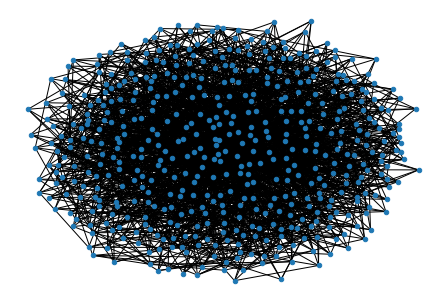

In [700]:
nx.draw_kamada_kawai(ba_net, node_size=20, widths=.2)

In [1081]:
ba_net_total=nx.barabasi_albert_graph(lv, 5)

In [915]:
ba_net_total.number_of_edges()

49360

### Degree distribution

In [1082]:
bant_k_nx=np.array(ba_net_total.degree())

In [1083]:
bant_kk_nx=np.unique(bant_k_nx[:,1], return_counts=True)

Let's compare the distribution obtained with the method above and the one by networkX:

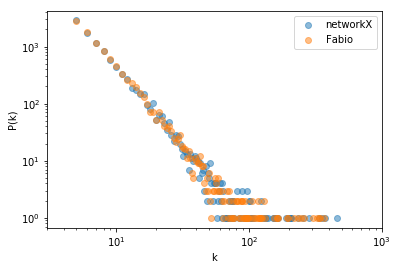

In [1072]:
plt.scatter(bant_kk_nx[0], bant_kk_nx[1], label='networkX', alpha=0.5)
plt.scatter(bant_kk[0], bant_kk[1], label='Fabio', alpha=0.5)
plt.xlabel('k')
plt.ylabel('P(k)')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(3, 10**3)
plt.show()

The theoretical distribution fits the data:

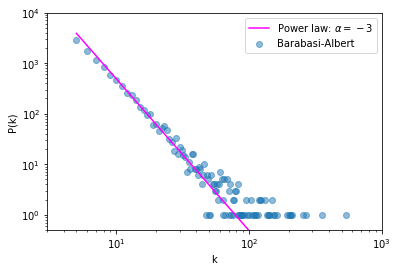

In [1307]:
plt.scatter(bant_kk_nx[0], bant_kk_nx[1], label='Barabasi-Albert', alpha=0.5)
plt.plot(bant_kk_nx[0], bant_kk_nx[0]**alpha_BA*c_BA, label=r'Power law: $\alpha=-3$', color='magenta') 
plt.xlabel('k')
plt.ylabel('P(k)')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(3, 10**3)
plt.ylim(5*10**-1, 10**4)
plt.show()

Actually, in the case of smaller networks, the distribution is not so evident due to the finite size effects.

In [221]:
ba_k=np.array(ba_net.degree())

In [222]:
ba_kk=np.unique(ba_k[:,1], return_counts=True)

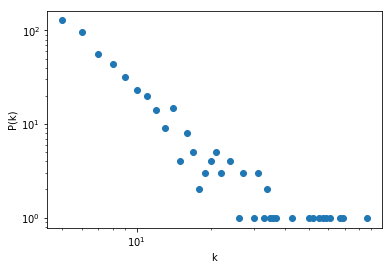

In [223]:
plt.scatter(ba_kk[0], ba_kk[1])
plt.xlabel('k')
plt.ylabel('P(k)')
plt.xscale('log')
plt.yscale('log')
plt.show()

### Clustering coefficient

In [224]:
len_sample=500

In [225]:
ba_net.number_of_nodes()

500

Theoretical expectation

In [226]:
def BA_th_c(n, m):
    return (np.log(n))**2/n

In [227]:
BA_th_c(500, 5)

0.07724270763394936

In [228]:
nx.average_clustering(ba_net)

0.0613799552982656

In [229]:
clustering_ba_500_5_nx=np.zeros(len_sample)
for i in notebook.tqdm(range(len_sample)):
    cacca=nx.barabasi_albert_graph(500, 5)
    clustering_ba_500_5_nx[i]=nx.average_clustering(cacca)

Let's check if the previous version worked properly:

In [996]:
clustering_ba_500_5=np.zeros(len_sample)
for i in notebook.tqdm(range(len_sample)):
    cacca=BA(500, 5)
    clustering_ba_500_5[i]=nx.average_clustering(cacca)

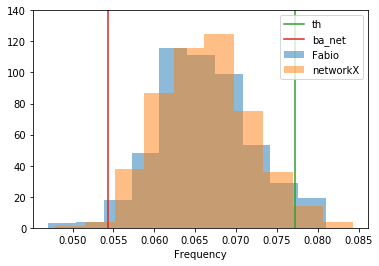

In [1301]:
plt.hist(clustering_ba_500_5, label='Fabio', alpha=0.5)
plt.hist(clustering_ba_500_5_nx, label='networkX', alpha=0.5)
plt.plot([BA_th_c(500, 5),BA_th_c(500, 5)],[0, 140], label='th')
plt.plot([nx.average_clustering(ba_net),nx.average_clustering(ba_net)],[0, 140], label='ba_net')
plt.legend()
plt.ylim(0, 140)
plt.xlabel('C')
plt.xlabel('Frequency')
plt.show()

#### Summarising

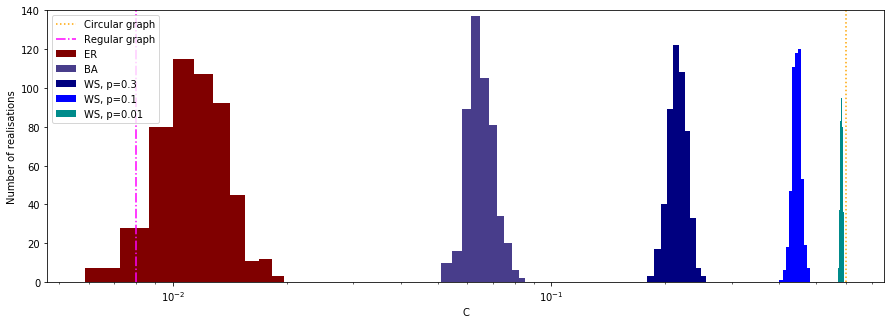

In [231]:
plt.figure(figsize=(15,5))
plt.hist(clustering_er,  label='ER', color='maroon')
plt.plot([smaller_circular_c, smaller_circular_c],[0, 140], label='Circular graph', linestyle='dotted', color='orange')
plt.plot([smaller_regular_c, smaller_regular_c],[0, 140], label='Regular graph', linestyle='-.', color='magenta')
plt.hist(clustering_ba_500_5_nx, label='BA', color='darkslateblue')
plt.hist(clustering_ws_03,  label='WS, p=0.3', color='navy')
plt.hist(clustering_ws_01,  label='WS, p=0.1', color='blue')
plt.hist(clustering_ws_001, label='WS, p=0.01', color='darkcyan')
#for t in enumerate(titles):
#    plt.plot([ws_vec_ac[t[0]],ws_vec_ac[t[0]]],[0, 200], label='WS'+t[1], linestyle='--')
plt.legend()
plt.xlabel('C')
plt.ylabel('Number of realisations')
plt.xscale('log')
plt.ylim(0, 140)
plt.savefig('../Images/ba_ws_er_reg_clustering.png')
plt.show()

In [232]:
BA_th_c(lv, 5)

0.008565611380135127

In [238]:
nx.average_clustering(ba_net_total)

0.007015938487259824

### Average Shortest Path Length

**!!!! DO NOT RE-EVALUATE THE FOLLOWING CELL!!!!**

In [783]:
nx.average_shortest_path_length(ba_net_total)

3.6422568266059736

In [854]:
nx.average_shortest_path_length(ba_net)

2.7839839679358716

In [968]:
def BA_th_aspl(n, m):
    return (np.log(n))/np.log(np.log(n))

In [ ]:
aspl_ba_500_5_nx=np.zeros(len_sample)
for i in notebook.tqdm(range(len_sample)):
    cacca=nx.barabasi_albert_graph(500, 5)
    aspl_ba_500_5_nx[i]=nx.nx.average_shortest_path_length(cacca)

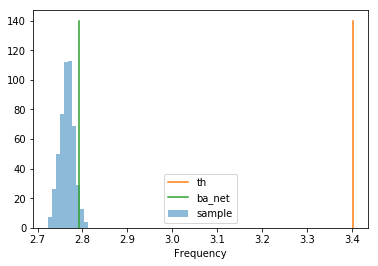

In [1309]:
plt.hist(aspl_ba_500_5_nx, label='sample', alpha=0.5)
plt.plot([BA_th_aspl(500, 5),BA_th_aspl(500, 5)],[0, 140], label='th')
plt.plot([nx.average_shortest_path_length(ba_net),nx.average_shortest_path_length(ba_net)],[0, 140], label='ba_net')
plt.legend()
plt.xlabel('ASPL')
plt.xlabel('Frequency')
plt.savefig('../Images/ba_aspl_distribution.png')
plt.show()

#### Summarising

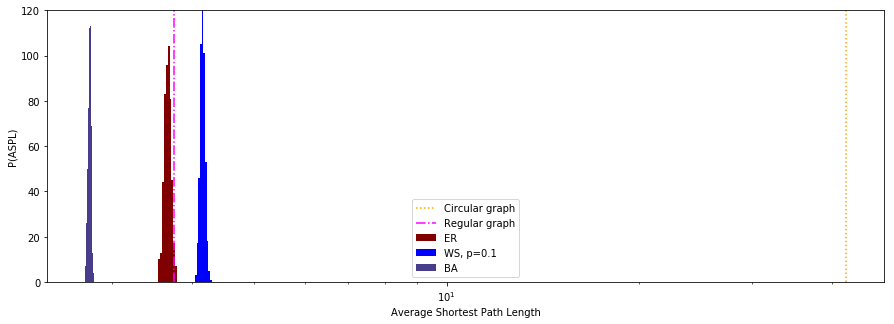

In [1251]:
plt.figure(figsize=(15,5))
plt.hist(apl_er, label='ER', color='maroon')
plt.plot([smaller_circular_apl, smaller_circular_apl],[0, 150], label='Circular graph', linestyle='dotted', color='orange')
plt.plot([smaller_regular_apl, smaller_regular_apl],[0, 150], label='Regular graph', linestyle='-.', color='magenta')
plt.hist(aspl_ws_01, bins=10, label='WS, p=0.1', color='blue')
plt.hist(aspl_ba_500_5_nx, label='BA', color='darkslateblue')
plt.legend()
plt.xlabel('Average Shortest Path Length')
plt.ylabel('P(ASPL)')
plt.xscale('log')
plt.ylim(0,120)
plt.savefig('../Images/ba_ws_er_reg_ASPL.png')
plt.show()

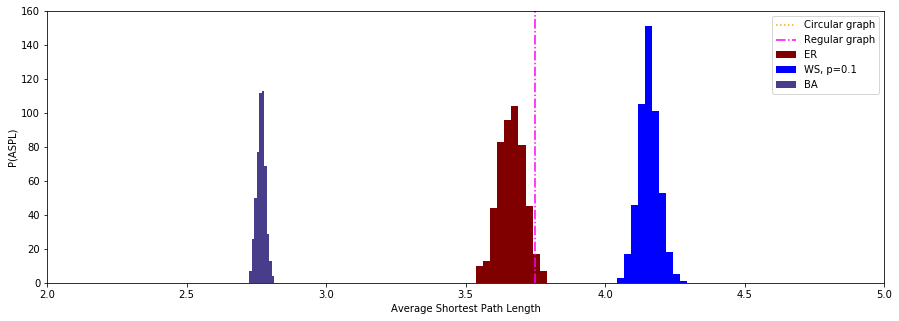

In [1261]:
plt.figure(figsize=(15,5))
plt.hist(apl_er, label='ER', color='maroon')
plt.plot([smaller_circular_apl, smaller_circular_apl],[0, 170], label='Circular graph', linestyle='dotted', color='orange')
plt.plot([smaller_regular_apl, smaller_regular_apl],[0, 170], label='Regular graph', linestyle='-.', color='magenta')
plt.hist(aspl_ws_01, bins=10, label='WS, p=0.1', color='blue')
plt.hist(aspl_ba_500_5_nx, label='BA', color='darkslateblue')
plt.legend()
plt.xlabel('Average Shortest Path Length')
plt.ylabel('P(ASPL)')
#plt.xscale('log')
plt.ylim(0,160)
plt.xlim(2,5)
plt.savefig('../Images/ba_ws_er_reg_ASPL_zoom.png')
plt.show()

## Bianconi-Barabasi

### Exercise: implement the Bianconi-Barabasi model

Implement a flat distributed fitness...

#### Solution

In [1239]:
def BB_flat(n, m_0):
    # Let's start with an empty graph with m nodes 
    # (actually, the inital conditions are not crucial for the main properties of a BA-model)
    bb_g=nx.empty_graph(m_0)
    # The first move is sort of automatic:
    bb_g.add_edges_from([(m_0,node) for node in range(m_0)])
    fitnesses=random.rand(m_0+1)
    
    
    for node in range(m_0+1, n):
        bb_g_ds=np.array(bb_g.degree())
        p_BB_flat=bb_g_ds[:, 1]*fitnesses
        p_BB_flat=p_BB_flat/np.sum(p_BB_flat)
        #print('p_BB_flat={0:}, fitnesses={1:}'.format(p_BB_flat, fitnesses))
        winners=random.choice(node, size=5, p=p_BB_flat, replace=False)
        for i in winners:
            bb_g.add_edge(i,node)
        fitnesses=np.concatenate((fitnesses, random.rand(1)))
    return bb_g

In [1212]:
%timeit BB_flat(500, 5)

287 ms ± 1.19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Not even that slow...

In [1213]:
bb_net=BB_flat(500,5)

In [1216]:
bb_net_total=BB_flat(lv, 5)

##### Check: degree distribution

In [1217]:
bbnt_k=np.array(bb_net_total.degree())

In [1218]:
bbnt_kk=np.unique(bbnt_k[:,1], return_counts=True)

In [1235]:
alpha_BB_flat=-2.255
#alpha_BB_flat=-3.
c_BB_flat=bbnt_kk[1][20]/(bbnt_kk[0][20]**alpha_BB_flat/np.log(bbnt_kk[0][20]))

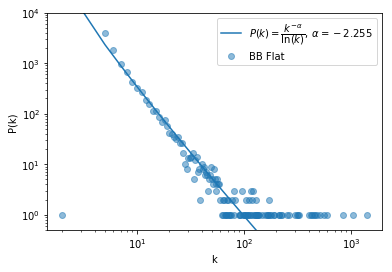

In [1238]:
#plt.scatter(bant_kk_nx[0], bant_kk_nx[1], label='BA', alpha=0.5)
plt.scatter(bbnt_kk[0], bbnt_kk[1], label='BB Flat', alpha=0.5)
#plt.plot(bant_kk_nx[0], bant_kk_nx[0]**alpha_BA*c_BA, label=r'BA Power law fit $\alpha=-3.$')
plt.plot(bbnt_kk[0], bbnt_kk[0]**alpha_BB_flat*c_BB_flat/np.log(bbnt_kk[0]), label=r'$P(k)=\dfrac{k^{-\alpha}}{\ln(k)},\,\alpha=-2.255$')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylim(5*10**-1, 10**4)
plt.show()

### Actually...
... in this case there is no networkX help!

### Clustering

In [1059]:
len_sample=500

500

In [1276]:
clustering_bb_500_5_nx=np.zeros(len_sample)
for i in notebook.tqdm(range(len_sample)):
    cacca=BB_flat(500, 5)
    clustering_bb_500_5_nx[i]=nx.average_clustering(cacca)

#### Summarising

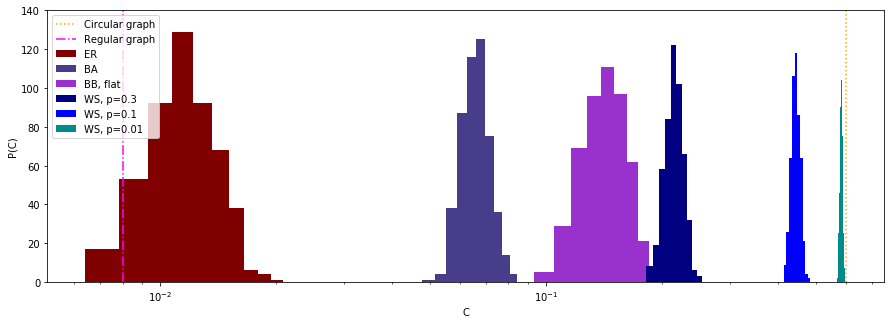

In [1277]:
plt.figure(figsize=(15,5))
plt.hist(clustering_er,  label='ER', color='maroon')
plt.plot([smaller_circular_c, smaller_circular_c],[0, 140], label='Circular graph', linestyle='dotted', color='orange')
plt.plot([smaller_regular_c, smaller_regular_c],[0, 140], label='Regular graph', linestyle='-.', color='magenta')
plt.hist(clustering_ba_500_5_nx, label='BA', color='darkslateblue')
plt.hist(clustering_bb_500_5_nx, label='BB, flat', color='darkorchid')
plt.hist(clustering_ws_03,  label='WS, p=0.3', color='navy')
plt.hist(clustering_ws_01,  label='WS, p=0.1', color='blue')
plt.hist(clustering_ws_001, label='WS, p=0.01', color='darkcyan')
plt.legend()
plt.xlabel('C')
plt.ylabel('P(C)')
plt.xscale('log')
plt.ylim(0, 140)
plt.savefig('../Images/bb_ba_ws_er_reg_clustering.png')
plt.show()

### Average Shortest Path Length

In [1263]:
len_sample=500

In [1264]:
aspl_bb_500_5=np.zeros(len_sample)
for i in notebook.tqdm(range(len_sample)):
    cacca=BB_flat(500, 5)
    aspl_bb_500_5[i]=nx.average_shortest_path_length(cacca)

#### Summarising

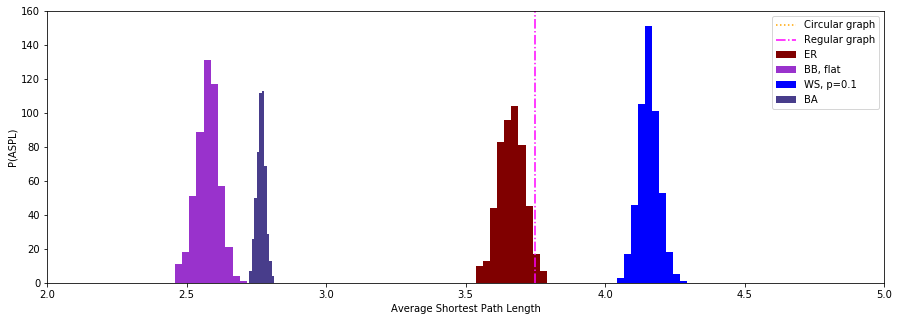

In [1275]:
plt.figure(figsize=(15,5))
plt.hist(apl_er, label='ER', color='maroon')
plt.plot([smaller_circular_apl, smaller_circular_apl],[0, 170], label='Circular graph', linestyle='dotted', color='orange')
plt.plot([smaller_regular_apl, smaller_regular_apl],[0, 170], label='Regular graph', linestyle='-.', color='magenta')
plt.hist(aspl_bb_500_5, label='BB, flat', color='darkorchid')
plt.hist(aspl_ws_01, bins=10, label='WS, p=0.1', color='blue')
plt.hist(aspl_ba_500_5_nx, label='BA', color='darkslateblue')
plt.legend()
plt.xlabel('Average Shortest Path Length')
plt.ylabel('P(ASPL)')
#plt.xscale('log')
plt.ylim(0,160)
plt.xlim(2,5)
plt.savefig('../Images/bb_ba_ws_er_reg_ASPL_zoom.png')
plt.show()